# Homework 1 : CUAHSI VU : Snow Hydrology

## B. Setup

All three exercises in Homework 1 will use the same data set for the simulations.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import warnings
warnings.filterwarnings('ignore')
import xarray as xr

Now let's just make sure it all works. We'll create a simulation object and will run a quick test simulation with the configuration that you now have.

In [8]:
ds = xr.open_dataset('./data/umpqua/forcing/Storck_AboveCanopyPP_9697.nc')

In [9]:
ds

<xarray.Dataset>
Dimensions:    (hru: 2, time: 1770)
Coordinates:
  * time       (time) datetime64[ns] 1996-11-25T21:59:59.999996640 ... 1997-0...
Dimensions without coordinates: hru
Data variables:
    hruId      (hru) int32 ...
    latitude   (hru) float64 ...
    longitude  (hru) float64 ...
    data_step  timedelta64[ns] ...
    LWRadAtm   (time, hru) float64 ...
    SWRadAtm   (time, hru) float64 ...
    airpres    (time, hru) float64 ...
    airtemp    (time, hru) float64 ...
    pptrate    (time, hru) float64 ...
    spechum    (time, hru) float64 ...
    windspd    (time, hru) float64 ...
Attributes:
    dataset_orig_path:  /d2/anewman/summa/summaTestCases/testCases_data/input...
    history:            Tue Sep 27 21:53:13 2016: ncrename -d nHRU,hru ./inpu...
    NCO:                "4.6.0"

In [2]:
filemanager = './data/umpqua/settings/snow_fileManager_umpqua.txt'
executable = 'summa.exe'
s = ps.Simulation(executable, filemanager)

Let's run the test case. This one may take a bit longer than the previous simulations and may take about up to a minute to run.

In [3]:
s.run('local', run_suffix='_homework1_b')

This doesn't actually produce any output, so to make sure that your run completed successfully, you can look at the value of `s.status`

In [4]:
s.status

'Success'

This should result in 'Success'. If it is 'Error', then you can investigate the reason for the error by using

`print(s.stdout)` or
`print(s.stderr)`

A common problem in these notebooks is that when you rerun a model run, the output files associated with the original run are still open. In that case, the error message from `print(s.stdout)` says something like

```
FATAL ERROR: summa_manageOutputFiles/summa_defineOutputFiles/def_output/iCreate[create][Permission denied]
```

If that is the case, just run it again and it will work. The safer way would be to create a new simulation object for each individual run that you do in the same notebook.

And a quick plot of the snow water equivalent time series to make sure we get output that is meaningful. Note that we can select the first hru by using `isel()` to select by index. The first hru is at position 0, so we'll use `isel(hru=0)`.

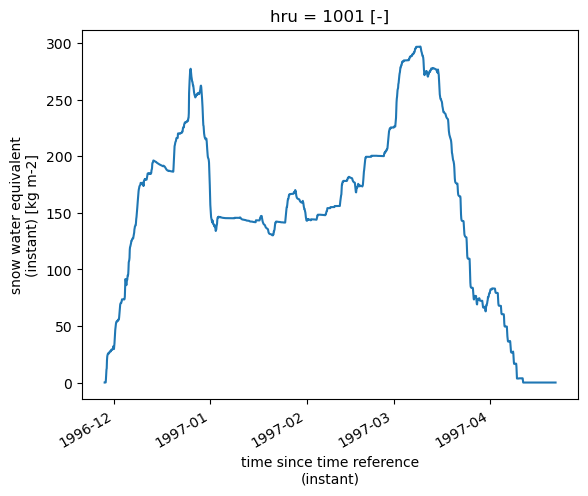

In [5]:
s.output['scalarSWE'].isel(hru=0).plot()

If you inspect the model output (by just typing `s.output`), you will notice that there are actually two hrus (hydrologic response units) in the input and output files. The data we are using in this exercise come from observations that Pascal Storck did as part of his PhD at the University of Washington in the mid- to late 1990s. The measurements were made in southern Oregon on the west slope of the Cascade mountains, an area in the transient snow zone that receives a lot of precipitation in winter. One of the goals of the work was to examine the effects of forest harvest practices on snow and hydrology. The first HRU represents a forest clearing, while the second hru represents a forested site.

To plot output for the clearing and the forest, you can do something like:

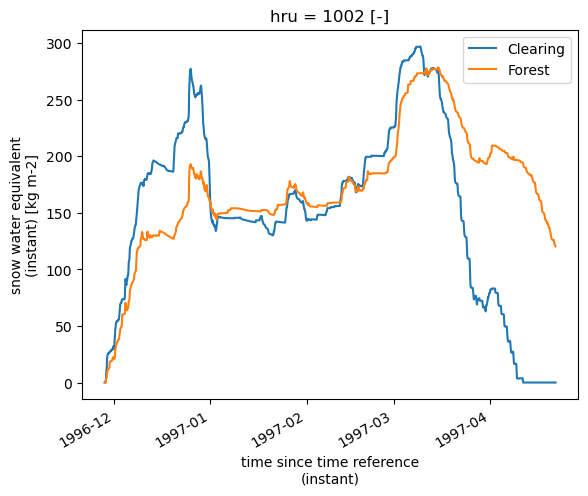

In [6]:
s.output['scalarSWE'].isel(hru=0).plot(label='Clearing')
s.output['scalarSWE'].isel(hru=1).plot(label='Forest')
plt.legend()

Here the forest SWE is actually the snow on the ground (under the trees). Does this look like you'd expect? We'll come back to this in the notebooks that follow.

## On to the next step

You're all set up for the homework assignment and in the next three notebooks it will be your turn to write some python code to manipulate the simulations. Save this notebook and close the tab. You can also right-click on the file in the left panel if it has a green dot next to it and select "_Shutdown kernel_" from the popup menu to stop the python session that is executing the commands in this notebook. Then open the next notebook: `/home/jovyan/data/cuahsi_vu/homework_1/homework_1_C_exercise_1.ipynb`.